In [1]:
name_code           = "03_Code_JuliaPure";
path_models         = "../outputs/"*name_code*"/models/";
path_images         = "../outputs/"*name_code*"/images/";
path_modules        = "../modules/"
path_gridap_makie   = "../gridap_makie/";
path_videos         = "./videos/";
path_plots          = "../outputs/"*name_code*"/plots/";

In [2]:
# set unit convertion constant
const Bohr_radius_meter=5.29177210903e−11;                        # [m]
const Angstrom_to_meter=1e−10;                                    # [m/Å]
const Angstrom_to_au=Angstrom_to_meter*(1.0/Bohr_radius_meter);   # [au/Å]
const Femtoseconds_to_au=(1.0/0.0218884);                         # [au/fs

In [3]:
set_Rc_value=2; # set_Rc_value=1 or set_Rc_value=2
if (set_Rc_value==1)
    Rc=1.5*Angstrom_to_au;  # screening parameter
    χ₀=-3.5*Angstrom_to_au; # Gaussian's center of init state
    n_eigenstate=1;         # fundamental state
elseif (set_Rc_value==2) 
    Rc=5.0*Angstrom_to_au;
    χ₀=-1.5*Angstrom_to_au;
    n_eigenstate=2;  # first excited state
end

2

In [9]:
using DelimitedFiles;
using Plots;

In [11]:
outfile_name = path_images*"electronic_density_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2)).dat"
electronic_ρ_matrix_χ_plus_r = readdlm(outfile_name, Float64);
electronic_ρ_matrix_χ = electronic_ρ_matrix_χ_plus_r[:,2:end]

outfile_name = path_images*"nuclear_density_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2)).dat"
nuclear_ρ_matrix_χ_plus_r = readdlm(outfile_name, Float64);
nuclear_ρ_matrix_χ = nuclear_ρ_matrix_χ_plus_r[:,2:end]

outfile_name = path_images*"total_shannon_entropy_vs_time_Rc$(round(Rc/Angstrom_to_au;digits=2)).dat"
total_S_2D_χ_plus_t = readdlm(outfile_name, Float64);

In [13]:
DOF_r=electronic_ρ_matrix_χ_plus_r[:,1];
DOF_χ=nuclear_ρ_matrix_χ_plus_r[:,1];
time_vec=total_S_2D_χ_plus_t[:,1];

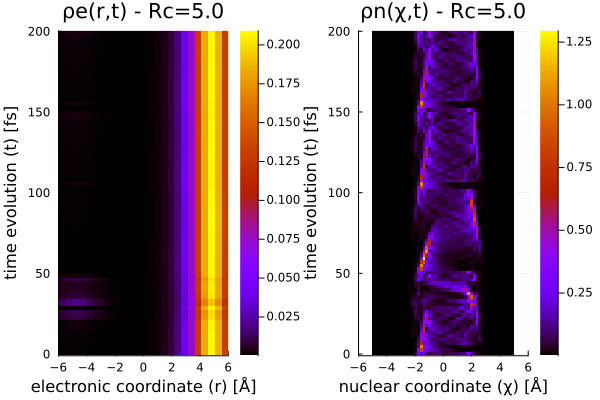

In [14]:
plot1=plot();
plot1=heatmap!(plot1,DOF_r./Angstrom_to_au, time_vec./Femtoseconds_to_au,transpose(electronic_ρ_matrix_χ),
                c = :gnuplot,xlims=(-6,6))
plot1=plot!(plot1,xlabel="electronic coordinate (r) [Å]",ylabel="time evolution (t) [fs]")
plot1=plot!(plot1,title="ρe(r,t) - Rc=$(round(Rc/Angstrom_to_au,digits=2))")

plot2=plot();
plot2=heatmap!(plot2,DOF_χ./Angstrom_to_au, time_vec./Femtoseconds_to_au,transpose(nuclear_ρ_matrix_χ),
                c = :gnuplot,xlims=(-6,6))
plot2=plot!(plot2,xlabel="nuclear coordinate (χ) [Å]",ylabel="time evolution (t) [fs]")
plot2=plot!(plot2,title="ρn(χ,t) - Rc=$(round(Rc/Angstrom_to_au,digits=2))")

display(plot(plot1,plot2,layout=(1,2)))